<a href="https://colab.research.google.com/github/IyadKhuder/movie_rating_predictor/blob/main/IMDB_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Engr. Iyad Khuder
###  *Date:* Monday, February 20th, 2023

###  *Problem:*
A model in Python to predict IMDB rating and measure the accuracy of the model

# I. SETUP & Data surveillance 

---




### *Importing Modules*




In [ ]:
import io
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

import json #converting JSON to lists for dataframe
import warnings
warnings.filterwarnings('ignore')
import base64
import codecs
from IPython.display import HTML

%matplotlib inline

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

### *Importing Google-Drive relevant libraries*

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = 'google drive file id' #<-- You add in here the id from you google drive file, you can find it

# The link to the dataset on my Google Drive:
# https://drive.google.com/file/d/1JBelJu0AJGB_IYVQxVNirrnptAMaxWPA/view?usp=sharing
# Hence, we get the ID of the dataset file: 
Google_ID = '1JBelJu0AJGB_IYVQxVNirrnptAMaxWPA'
download = drive.CreateFile({'id': Google_ID})

# Download the file to a local disc
download.GetContentFile('IMDb_Dataset.csv')


In [ ]:
df = pd.read_csv('IMDb_Dataset.csv')

* Surveillance over the dataset



In [ ]:
df.shape

(5043, 28)

In [ ]:
for col in df:
  print(col)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


We notice that the field that represents the movie's rating is: imdb_score

We also notice that the fields that are most correlated to the rating and are 
* efficient to use are:
* director_name
* director_facebook_likes
* actor_3_facebook_likes
* actor_2_name
* actor_1_facebook_likes
* gross
* genres
* actor_1_name
* num_voted_users
* cast_total_facebook_likes
* actor_3_name
* plot_keywords
* num_user_for_reviews
* country
* budget
* actor_2_facebook_likes
* imdb_score
* movie_facebook_likes







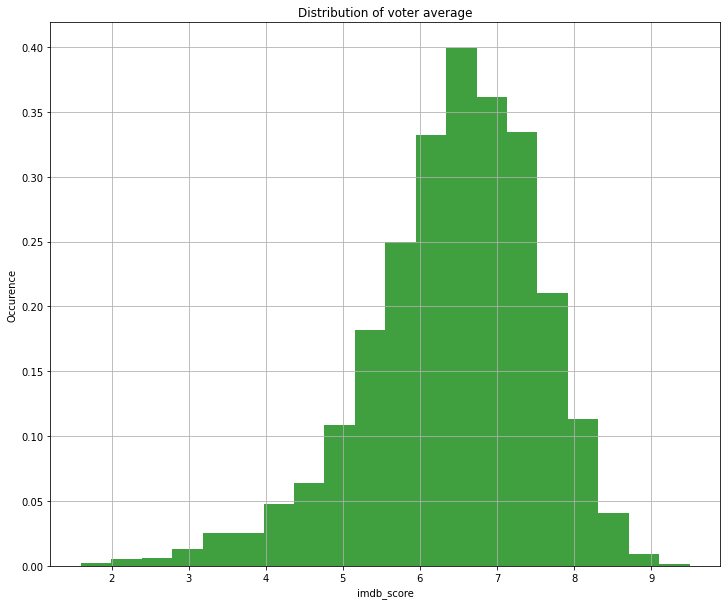

Minimum of Ratings: 1.6
Maximum of Ratings: 9.5
Average of Ratings: 6.44
Variance of Ratings: 1.27


In [ ]:
plt.subplots(figsize=(12,10))
n, bins, patches = plt.hist(df['imdb_score'], 20, density=1, facecolor='g', alpha=0.75)

plt.xlabel('imdb_score')
plt.ylabel('Occurence')
plt.title('Distribution of voter average')
plt.grid(True)
plt.show()
print("Minimum of Ratings:", round(min(df['imdb_score']),2))
print("Maximum of Ratings:", round(max(df['imdb_score']),2))
print("Average of Ratings:", round(np.mean(df['imdb_score']),2))
print("Variance of Ratings:",round(np.var(df['imdb_score']),2))

## II. Dataset Preprocessing

---



* Dataset Cleaning

*checking records with rating = 0:*

In [ ]:
counts = df[(df['imdb_score']==0)]['imdb_score'] # get vote counts for all movies that have a rating of 0.0

print("Unique vote counts for movies with 0.0 rating")
for u in set(counts):
    print(u)

Unique vote counts for movies with 0.0 rating


Extracting the above-mentioned fields from df, moving the 'imdb_score' field to the end (as it is the output feature), and saving it in a new one:

In [ ]:
df = df[ ['movie_title','director_name','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','gross','genres','actor_1_name','num_voted_users','cast_total_facebook_likes','actor_3_name','plot_keywords','num_user_for_reviews','country','budget','actor_2_facebook_likes','movie_facebook_likes','imdb_score'] ]

* Shortening the fields with too long names (to reduce the width of the table, for display purposes):

In [ ]:
df = df.rename(columns={'plot_keywords': 'keywords'})
df = df.rename(columns={'director_facebook_likes': 'director_FBLikes'})
df = df.rename(columns={'actor_1_facebook_likes': 'act1_FBLikes'})
df = df.rename(columns={'actor_2_facebook_likes': 'act2_FBLikes'})
df = df.rename(columns={'actor_3_facebook_likes': 'act3_FBLikes'})
df = df.rename(columns={'actor_1_name': 'act1_name'})
df = df.rename(columns={'actor_2_name': 'act2_name'})
df = df.rename(columns={'actor_3_name': 'act3_name'})
df = df.rename(columns={'cast_total_facebook_likes': 'cast_total_FBLikes'})
df = df.rename(columns={'movie_facebook_likes': 'movie_FBLikes'})
df = df.rename(columns={'num_voted_users': 'vote_users'})
df = df.rename(columns={'num_user_for_reviews': 'review_users'})
df = df.rename(columns={'imdb_score': 'rating'})


In [ ]:
df.head()

,movie_title,director_name,director_FBLikes,act3_FBLikes,act2_name,act1_FBLikes,gross,genres,act1_name,vote_users,cast_total_FBLikes,act3_name,keywords,review_users,country,budget,act2_FBLikes,movie_FBLikes,rating
0,Avatar,James Cameron,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,USA,237000000.0,936.0,33000,7.9
1,Pirates of the Caribbean: At World's End,Gore Verbinski,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,300000000.0,5000.0,0,7.1
2,Spectre,Sam Mendes,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.0,UK,245000000.0,393.0,85000,6.8
3,The Dark Knight Rises,Christopher Nolan,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.0,USA,250000000.0,23000.0,164000,8.5
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,NaN,NaN,NaN,NaN,12.0,0,7.1


Note: I've kept the 'movie_title', not because it is correlated to the score, but rather because it is the main identifier of the movie.

In [ ]:
df.shape

(5043, 19)

In [ ]:
# Number of missing values for each column, sorted in descending order
df.isnull().sum().sort_values(ascending=False)

gross                 884
budget                492
keywords              153
director_FBLikes      104
director_name         104
act3_FBLikes           23
act3_name              23
review_users           21
act2_name              13
act2_FBLikes           13
act1_FBLikes            7
act1_name               7
country                 5
movie_title             0
movie_FBLikes           0
vote_users              0
cast_total_FBLikes      0
genres                  0
rating                  0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(3851, 19)

In [ ]:
# Number of missing values for each column, sorted in descending order
df.isnull().sum().sort_values(ascending=False)

movie_title           0
cast_total_FBLikes    0
movie_FBLikes         0
act2_FBLikes          0
budget                0
country               0
review_users          0
keywords              0
act3_name             0
vote_users            0
director_name         0
act1_name             0
genres                0
gross                 0
act1_FBLikes          0
act2_name             0
act3_FBLikes          0
director_FBLikes      0
rating                0
dtype: int64

# II. Data Preprocessing

---



## **Formatting fields**

* Converting the bar-separated-values fields into a lists:

The following fields are bar-separated-values:
* genres
* keywords


In [ ]:
def string_to_list(composite_string):
    return composite_string.split('|')

In [ ]:
df['keywords'] = df['keywords'].apply(string_to_list)
df['genres'] = df['genres'].apply(string_to_list)


I will convert all string fields, which represent potential features, into lists as well, so I can apply the same processing steps on them later.

In [ ]:
df['director_name'] = df['director_name'].apply(string_to_list)
df['act2_name'] = df['act2_name'].apply(string_to_list)
df['act1_name'] = df['act1_name'].apply(string_to_list)
df['act3_name'] = df['act3_name'].apply(string_to_list)
df['country'] = df['country'].apply(string_to_list)


In [ ]:
df.sample(10)

,movie_title,director_name,director_FBLikes,act3_FBLikes,act2_name,act1_FBLikes,gross,genres,act1_name,vote_users,cast_total_FBLikes,act3_name,keywords,review_users,country,budget,act2_FBLikes,movie_FBLikes,rating
1259,Sex Tape,[Jake Kasdan],52.0,214.0,[Randall Park],683.0,38543473.0,[Comedy],[James Wilcox],84382,1488,[Nat Faxon],"[sex in a car, sex video, sexual desire, sexua...",158.0,[USA],40000000.0,392.0,0,5.1
1304,Cirque du Freak: The Vampire's Assistant,[Paul Weitz],80.0,835.0,[Salma Hayek],14000.0,13838130.0,"[Action, Adventure, Fantasy, Thriller]",[Josh Hutcherson],35990,20503,[Patrick Fugit],"[antidote, based on young adult novel, flyer, ...",157.0,[USA],40000000.0,4000.0,0,5.9
4860,Cube,[Vincenzo Natali],165.0,319.0,[Julian Richings],686.0,489220.0,"[Mystery, Sci-Fi, Thriller]",[David Hewlett],160511,1743,[Nicole de Boer],"[escape, labyrinth, maze, red light, trap]",696.0,[Canada],365000.0,648.0,11000,7.3
2535,Sense and Sensibility,[Ang Lee],0.0,1000.0,[Kate Winslet],25000.0,42700000.0,"[Drama, Romance]",[Alan Rickman],78392,41059,[Tom Wilkinson],"[1810s, female protagonist, horseback riding, ...",196.0,[USA],16500000.0,14000.0,0,7.7
4489,The Day the Earth Stood Still,[Scott Derrickson],301.0,71.0,[Jon Hamm],18000.0,79363785.0,"[Drama, Sci-Fi, Thriller]",[Keanu Reeves],139426,22194,[Juan Riedinger],"[alien, earth, giant robot, military, scientist]",698.0,[USA],80000000.0,4000.0,0,5.5
2021,Scream 2,[Wes Craven],0.0,221.0,[Jada Pinkett Smith],865.0,101334374.0,"[Horror, Mystery]",[Omar Epps],124941,2321,[Kevin Williamson],"[college, ghostface, killer, killing spree, mu...",488.0,[USA],24000000.0,851.0,0,6.1
4095,8 Heads in a Duffel Bag,[Tom Schulman],45.0,267.0,[George Hamilton],578.0,3559990.0,"[Comedy, Crime]",[Kristy Swanson],8005,1363,[Dyan Cannon],"[camera shot of feet, female stockinged feet, ...",49.0,[USA],3000000.0,341.0,417,5.3
2865,Woo,[Daisy von Scherler Mayer],18.0,744.0,[Jada Pinkett Smith],1000.0,8026971.0,"[Comedy, Romance]",[LL Cool J],1520,3352,[Dave Chappelle],"[blind date, law clerk, love, manhattan new yo...",20.0,[USA],13000000.0,851.0,204,3.8
4593,Chocolate: Deep Dark Secrets,[Vivek Agnihotri],5.0,219.0,[Anil Kapoor],724.0,49000.0,[Thriller],[Emraan Hashmi],1524,2024,[Sunil Shetty],"[chocolate, christmas, christmas eve, death, s...",30.0,[India],1500000.0,668.0,31,4.8
2914,Tae Guk Gi: The Brotherhood of War,[Je-kyu Kang],16.0,489.0,[Bin Won],717.0,1110186.0,"[Action, Drama, War]",[Min-sik Choi],31943,1730,[Dong-gun Jang],"[1950s, archeologist, korea, korean war, soldier]",224.0,[South Korea],12800000.0,517.0,0,8.1


* **Encoding the list-fields**

 The following function does several processing steps on the input list-field:
 * 1) It is applied on a certain list-field each time it is called
 * 2) It scans all the unique values of the input field
 * 3) It checks all the rating values associated with that specific value of the given list-field, and returns the average rating
 * 4) It plots a histogram of the average rating for all the unique values of the given list-field


In [ ]:
def list_field_processing(df, field_name): # create a list of all unique values in the list-field
    #Step 1: track all ratings associated with each value in a dictionary
    field_dict = {}
    for index, row in df.iterrows():
        field_list = row[field_name]
        for fieldList_item in field_list:
            if fieldList_item not in field_dict:
                field_dict[fieldList_item] = (df['rating'][index], 1) #
            else:
                field_dict[fieldList_item] = (field_dict[fieldList_item][0] + (df['rating'][index]), field_dict[fieldList_item][1] + 1)
    #Step 2: calculate average ratings for each feature
    for key in field_dict:
        field_dict[key] = field_dict[key][0]/field_dict[key][1] #average of all ratings
       
    #Step 3: create and sort a list of tuples (dictionary value, key)
    lst = list()
    for name in field_dict:
        lst.append((field_dict[name],name))
    lst = sorted(lst)
    #step 4: create a list of only the feature names, from lowest rating to highest rating
    feature_list = list()
    ratings_list = list()
    for element in lst:
        feature_list.append(element[1])
        ratings_list.append(element[0])
    
    #get the variance of the ratings. This is helpful for determining the usefulness of the information (to be displayed in below plot)
    var = round(np.var(ratings_list),3)
    
    #before returning the list, do a quick visualization to show that generate_list works
    fig, ax = plt.subplots(figsize=(6,5))
    if field_name != 'genres':
        n = 50 # sample at intervals of n
    else:
        n = 1
    X = [] #sample for associated movie(s) rating average
    Y = [] #sample for feature names
    for i in range(0, len(feature_list) - 1, n):
        X.append(ratings_list[i])
        Y.append(feature_list[i])
    
    y_pos = np.arange(len(Y))
    ax.barh(y_pos, X, align='center')
    #ax.set_yticklabels(Y)
    ax.invert_yaxis()  # labels read top-to-bottom
    
    ax.set_xlabel('Overall average movie ratings')
    ax.set_ylabel(field_name + ' sample list index')
    ax.set_title(field_name + ' to associated movie(s) performance (' + str(int(len(feature_list)/n)) + ' samples), variance: ' + str(var))
    
    plt.show()
    
    return feature_list

1) To explain that, let's start with the list-field: genres:

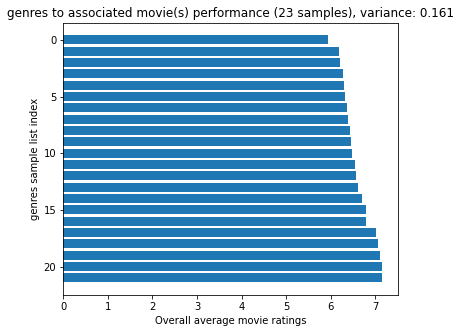

In [ ]:
genres_list = list_field_processing(df, 'genres')

We notice that the variance of the unique values of the genres, associated with the rating, is not significant. Therefore, the field "genres" does not have enough correlation with the movie rating. For this reason, I will drop it from the list of features.

Dropping the 'genres' field off the dataframe:

2) keywords

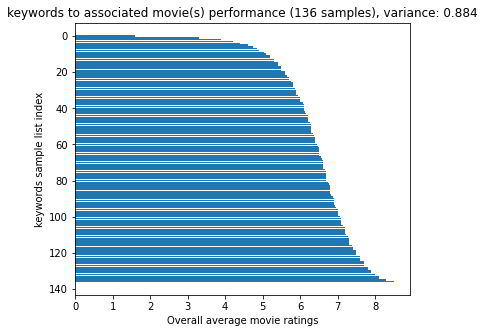

In [ ]:
keywords_list = list_field_processing(df, 'keywords')

The 'keywords' field, in contrast, has a considerable variance associated with the rating, and therefore it will be kept as a feature.

In [ ]:
print(f"There are {len(keywords_list)} unique keywords")

There are 6848 unique keywords


And here are 10 keywords:

In [ ]:
keywords_list[:10]

['boyhood friend',
 'plasma tv',
 'science experiment',
 'golf caddy',
 'music business',
 'tv commercial',
 'artifact',
 'chocolate factory',
 'bad acting',
 'resistance fighter']

3) director_name

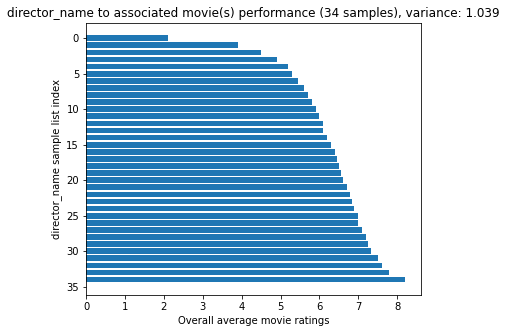

In [ ]:
director_list = list_field_processing(df, 'director_name')

The director_name, has also a remarkable variance associated with the rating, and therefore it will be kept as a feature.

4) actor_1_name

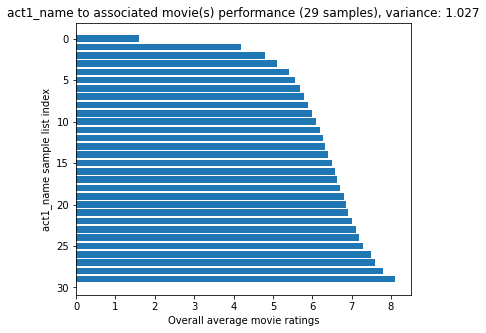

In [ ]:
actor_1_list = list_field_processing(df, 'act1_name')

The actor_1_name, has also a remarkable variance associated with the rating, and therefore it will be kept as a feature.

5) actor_2_name

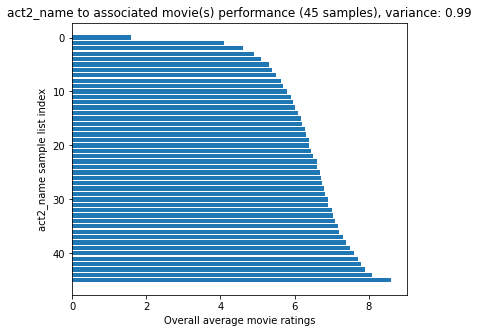

In [ ]:
actor_2_list = list_field_processing(df, 'act2_name')

The actor_2_name, has also a remarkable variance associated with the rating, and therefore it will be kept as a feature.

6) actor_3_name

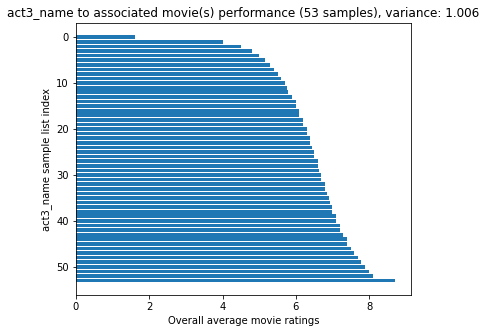

In [ ]:
actor_3_list = list_field_processing(df, 'act3_name')

The actor_3_name, has also a remarkable variance associated with the rating, and therefore it will be kept as a feature.

7) country

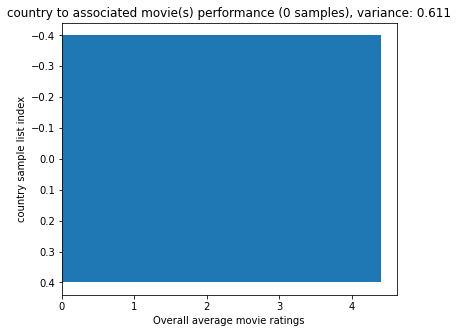

In [ ]:
country_list = list_field_processing(df, 'country')

We notice that the variance of the unique values of the 'country' field, associated with the rating, is quite negligible. Therefore, I will drop it from the list of features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         3851 non-null   object 
 1   director_name       3851 non-null   object 
 2   director_FBLikes    3851 non-null   float64
 3   act3_FBLikes        3851 non-null   float64
 4   act2_name           3851 non-null   object 
 5   act1_FBLikes        3851 non-null   float64
 6   gross               3851 non-null   float64
 7   genres              3851 non-null   object 
 8   act1_name           3851 non-null   object 
 9   vote_users          3851 non-null   int64  
 10  cast_total_FBLikes  3851 non-null   int64  
 11  act3_name           3851 non-null   object 
 12  keywords            3851 non-null   object 
 13  review_users        3851 non-null   float64
 14  country             3851 non-null   object 
 15  budget              3851 non-null   float64
 16  act2_F

Dropping both the 'genres' and 'country' fields off the dataframe:

In [ ]:
df = df[ ['movie_title','director_name','director_FBLikes','act3_FBLikes','act2_name','act1_FBLikes','gross','act1_name','vote_users','cast_total_FBLikes','act3_name','keywords','review_users','budget','act2_FBLikes','movie_FBLikes','rating'] ]

In [ ]:
df.head()

,movie_title,director_name,director_FBLikes,act3_FBLikes,act2_name,act1_FBLikes,gross,act1_name,vote_users,cast_total_FBLikes,act3_name,keywords,review_users,budget,act2_FBLikes,movie_FBLikes,rating
0,Avatar,[James Cameron],0.0,855.0,[Joel David Moore],1000.0,760505847.0,[CCH Pounder],886204,4834,[Wes Studi],"[avatar, future, marine, native, paraplegic]",3054.0,237000000.0,936.0,33000,7.9
1,Pirates of the Caribbean: At World's End,[Gore Verbinski],563.0,1000.0,[Orlando Bloom],40000.0,309404152.0,[Johnny Depp],471220,48350,[Jack Davenport],"[goddess, marriage ceremony, marriage proposal...",1238.0,300000000.0,5000.0,0,7.1
2,Spectre,[Sam Mendes],0.0,161.0,[Rory Kinnear],11000.0,200074175.0,[Christoph Waltz],275868,11700,[Stephanie Sigman],"[bomb, espionage, sequel, spy, terrorist]",994.0,245000000.0,393.0,85000,6.8
3,The Dark Knight Rises,[Christopher Nolan],22000.0,23000.0,[Christian Bale],27000.0,448130642.0,[Tom Hardy],1144337,106759,[Joseph Gordon-Levitt],"[deception, imprisonment, lawlessness, police ...",2701.0,250000000.0,23000.0,164000,8.5
5,John Carter,[Andrew Stanton],475.0,530.0,[Samantha Morton],640.0,73058679.0,[Daryl Sabara],212204,1873,[Polly Walker],"[alien, american civil war, male nipple, mars,...",738.0,263700000.0,632.0,24000,6.6


Thus, the remaining fields are the features that we will work with.

**Features:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         3851 non-null   object 
 1   director_name       3851 non-null   object 
 2   director_FBLikes    3851 non-null   float64
 3   act3_FBLikes        3851 non-null   float64
 4   act2_name           3851 non-null   object 
 5   act1_FBLikes        3851 non-null   float64
 6   gross               3851 non-null   float64
 7   act1_name           3851 non-null   object 
 8   vote_users          3851 non-null   int64  
 9   cast_total_FBLikes  3851 non-null   int64  
 10  act3_name           3851 non-null   object 
 11  keywords            3851 non-null   object 
 12  review_users        3851 non-null   float64
 13  budget              3851 non-null   float64
 14  act2_FBLikes        3851 non-null   float64
 15  movie_FBLikes       3851 non-null   int64  
 16  rating

* Encoding the list-fields

In [ ]:
def calculate_bin_array(this_list, all_features):
    bin_list = []
    for element in all_features:
        if element in this_list:
            bin_list.append(1)
        else:
            bin_list.append(0)
    return bin_list

In [ ]:
df['keywords'] = df['keywords'].apply(lambda x: calculate_bin_array(x, keywords_list))

Likewise for the other list-fields:

In [ ]:
df['director_name'] = df['director_name'].apply(lambda x: calculate_bin_array(x, director_list))

In [ ]:
df['act1_name'] = df['act1_name'].apply(lambda x: calculate_bin_array(x, actor_1_list))

In [ ]:
df['act2_name'] = df['act2_name'].apply(lambda x: calculate_bin_array(x, actor_2_list))

In [ ]:
df['act3_name'] = df['act3_name'].apply(lambda x: calculate_bin_array(x, actor_3_list))

In [ ]:
df.head()

,movie_title,director_name,director_FBLikes,act3_FBLikes,act2_name,act1_FBLikes,gross,act1_name,vote_users,cast_total_FBLikes,act3_name,keywords,review_users,budget,act2_FBLikes,movie_FBLikes,rating
0,Avatar,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,855.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1000.0,760505847.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",886204,4834,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3054.0,237000000.0,936.0,33000,7.9
1,Pirates of the Caribbean: At World's End,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",563.0,1000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",40000.0,309404152.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",471220,48350,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1238.0,300000000.0,5000.0,0,7.1
2,Spectre,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,161.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11000.0,200074175.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",275868,11700,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",994.0,245000000.0,393.0,85000,6.8
3,The Dark Knight Rises,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",22000.0,23000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27000.0,448130642.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1144337,106759,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2701.0,250000000.0,23000.0,164000,8.5
5,John Carter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",475.0,530.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",640.0,73058679.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",212204,1873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",738.0,263700000.0,632.0,24000,6.6


In [ ]:
df.shape

(3851, 17)

Remove rows that contain at least one zero value:

In [ ]:
df = df[(df != 0).all(1)]

In [ ]:
df.shape

(1665, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 3 to 5042
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         1665 non-null   object 
 1   director_name       1665 non-null   object 
 2   director_FBLikes    1665 non-null   float64
 3   act3_FBLikes        1665 non-null   float64
 4   act2_name           1665 non-null   object 
 5   act1_FBLikes        1665 non-null   float64
 6   gross               1665 non-null   float64
 7   act1_name           1665 non-null   object 
 8   vote_users          1665 non-null   int64  
 9   cast_total_FBLikes  1665 non-null   int64  
 10  act3_name           1665 non-null   object 
 11  keywords            1665 non-null   object 
 12  review_users        1665 non-null   float64
 13  budget              1665 non-null   float64
 14  act2_FBLikes        1665 non-null   float64
 15  movie_FBLikes       1665 non-null   int64  
 16  rating

* Visualization and analysis of the sub-features' distribution

In [ ]:
def plot_binaries(mov):  

    keywords_bin = mov[11]
    keywords_index = []
    for i in range(len(keywords_bin)):
        if keywords_bin[i] == 1:
            keywords_index.append(i)
    
    director_bin = mov[1]
    director_index = []
    for i in range(len(director_bin)):
        if director_bin[i] == 1:
            director_index.append(i)
    
    actor_1_bin = mov[7]
    actor_1_index = []
    for i in range(len(actor_1_bin)):
        if actor_1_bin[i] == 1:
            actor_1_index.append(i)
    
    actor_2_bin = mov[4]
    actor_2_index = []
    for i in range(len(actor_2_bin)):
        if actor_2_bin[i] == 1:
            actor_2_index.append(i)
    
    actor_3_bin = mov[10]
    actor_3_index = []
    for i in range(len(actor_3_bin)):
        if actor_3_bin[i] == 1:
            actor_3_index.append(i)
    

    font = {'family': 'serif',
        'color':  'red',
        'weight': 'normal',
        'size': 10,
        }
    
    fig, ax = plt.subplots(5,1,figsize=(10,1))
    plt.subplots_adjust(hspace = 5)
    ax[0].scatter(keywords_index, np.zeros_like(keywords_index), vmin=-2)
    ax[0].set_title('Keywords:', loc = 'left', fontdict=font)
    ax[0].set_xlim(0,len(keywords_bin))
    ax[0].set_yticks([])
    ax[0].set_xticks([])
    
    ax[1].scatter(director_index, np.zeros_like(director_index), vmin=-2)
    ax[1].set_title('Director:', loc = 'left', fontdict=font)
    ax[1].set_xlim(0,len(director_bin))
    ax[1].set_yticks([])
    ax[1].set_xticks([])
    
    ax[2].scatter(actor_1_index, np.zeros_like(actor_1_index), vmin=-2)
    ax[2].set_title('actor_1', loc = 'left', fontdict=font)
    ax[2].set_xlim(0,len(actor_1_bin))
    ax[2].set_yticks([])
    ax[2].set_xticks([])
    
    ax[3].scatter(actor_2_index, np.zeros_like(actor_2_index), vmin=-2)
    ax[3].set_title('actor_2', loc = 'left', fontdict=font)
    ax[3].set_xlim(0,len(actor_2_bin))
    ax[3].set_yticks([])
    ax[3].set_xticks([])
    
    ax[4].scatter(actor_3_index, np.zeros_like(actor_3_index), vmin=-2)
    ax[4].set_title('actor_3', loc = 'left', fontdict=font)
    ax[4].set_xlim(0,len(actor_3_bin))
    ax[4].set_yticks([])
    ax[4].set_xticks([])
    


In [ ]:
movies_sample = df.sample(5)

In [ ]:
print(movies_sample)

          movie_title                                      director_name  \
1387  Reindeer Games   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3761    The Forsaken   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4649          Snitch   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
909          Beloved   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
711      Marley & Me   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

      director_FBLikes  act3_FBLikes  \
1387             287.0         475.0   
3761              23.0         560.0   
4649              29.0         874.0   
909              438.0         466.0   
711               64.0         664.0   

                                              act2_name  act1_FBLikes  \
1387  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        9000.0   
3761  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...         847.0   
4649  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       12000.0   
909   [0, 

Movie: Reindeer Games 
Rating: 5.7



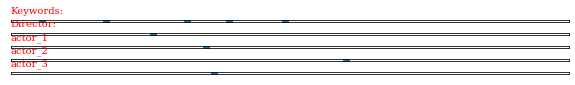

In [ ]:
print('Movie: ' + movies_sample.iloc[0][0] + '\nRating: ' + str(movies_sample.iloc[0][-1]) + '\n')
plot_binaries(movies_sample.iloc[0])

Movie:The Forsaken 
Rating: 5.3



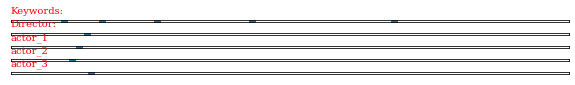

In [ ]:
print('Movie:' + movies_sample.iloc[1][0] + '\nRating: ' + str(movies_sample.iloc[1][-1]) + '\n')
plot_binaries(movies_sample.iloc[1])

Movie:Snitch 
Rating: 6.5



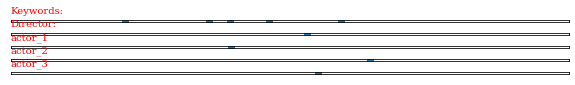

In [ ]:
print('Movie:' + movies_sample.iloc[2][0] + '\nRating: ' + str(movies_sample.iloc[2][-1]) + '\n')
plot_binaries(movies_sample.iloc[2])

Movie:Beloved 
Rating: 5.9



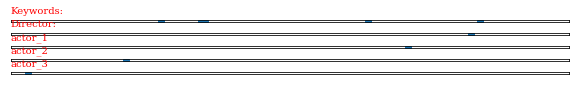

In [ ]:
print('Movie:' + movies_sample.iloc[3][0] + '\nRating: ' + str(movies_sample.iloc[3][-1]) + '\n')
plot_binaries(movies_sample.iloc[3])

Movie:Marley & Me 
Rating: 7.1



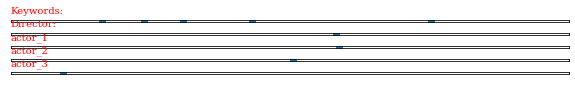

In [ ]:
print('Movie:' + movies_sample.iloc[4][0] + '\nRating: ' + str(movies_sample.iloc[4][-1]) + '\n')
plot_binaries(movies_sample.iloc[4])

We notice a correlation between the movie rating and the shift of the sub-features (i.e., the unique-values of the features' lists) to the right side; the most the sub-features are right-shifted, the more likely the movie rating is. 
Therefore, it is possible to assign scaled weights to those sub-features, and then to weight those list-features by a score, which can be a decimal number, that is calculated by summing the weights of the sub-features.

* **Finding the concentration points in each array**

Find areas where numbers are grouped, and identify points that resemble the centers of binary distribution

For example: [1110001111100101] -> [0300000050000020] -> [(1,3), (8,5), (14,2)] tuple[0] is the index of concentration, tuple[1] is the number of 1's about index

In [ ]:
def split_arr(arr, n_splits):
    # looping till length l 
    for i in range(0, len(arr), n_splits):  
        yield arr[i:i + n_splits]


In [ ]:
def find_concentration(arr, n = 100): # n is the number of concentration points to find
    #seperate array into batches
    batches = list(split_arr(arr,int(len(arr)/n)))
    concentrations = []
    for i in range(len(batches)):
        point = 0
        num_ones = 0
        for j in range(len(batches[i])):
            if batches[i][j] == 1:
                point += j + (i * int(len(arr)/n)) # adding correction for batches
                num_ones += 1
        if num_ones > 0:
            point = point/num_ones
            concentrations.append((point,num_ones))
    return concentrations


In [ ]:
def to_concentrations(df, feature_names):
    for feature_name in feature_names:
        print('feature: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: find_concentration(x))
    return df

In [ ]:
df.head()

,movie_title,director_name,director_FBLikes,act3_FBLikes,act2_name,act1_FBLikes,gross,act1_name,vote_users,cast_total_FBLikes,act3_name,keywords,review_users,budget,act2_FBLikes,movie_FBLikes,rating
3,The Dark Knight Rises,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",22000.0,23000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27000.0,448130642.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1144337,106759,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2701.0,250000000.0,23000.0,164000,8.5
5,John Carter,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",475.0,530.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",640.0,73058679.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",212204,1873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",738.0,263700000.0,632.0,24000,6.6
7,Tangled,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,284.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",799.0,200807262.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",294810,2036,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",387.0,260000000.0,553.0,29000,7.8
9,Harry Potter and the Half-Blood Prince,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",282.0,10000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25000.0,301956980.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",321795,58753,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",973.0,250000000.0,11000.0,10000,7.5
13,Pirates of the Caribbean: Dead Man's Chest,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",563.0,1000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",40000.0,423032628.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",522040,48486,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1832.0,225000000.0,5000.0,5000,7.3


In [ ]:
list_features = ['director_name','act2_name','act1_name','act3_name','keywords']

In [ ]:
df = to_concentrations(df, list_features)

feature:  director_name
feature:  act2_name
feature:  act1_name
feature:  act3_name
feature:  keywords


In [ ]:
df.sample(5)

,movie_title,director_name,director_FBLikes,act3_FBLikes,act2_name,act1_FBLikes,gross,act1_name,vote_users,cast_total_FBLikes,act3_name,keywords,review_users,budget,act2_FBLikes,movie_FBLikes,rating
2107,"Hail, Caesar!","[(1379.0, 1)]",1000.0,1000.0,"[(769.0, 1)]",19000.0,29997095.0,"[(1010.0, 1)]",60926,38494,"[(1099.0, 1)]","[(959.0, 1), (1275.0, 1), (2771.0, 1), (2832.0...",302.0,22000000.0,17000.0,23000,6.4
3922,Secretary,"[(1141.0, 1)]",30.0,296.0,"[(1724.0, 1)]",769.0,4046737.0,"[(1141.0, 1)]",67949,2251,"[(1963.0, 1)]","[(2450.0, 1), (4316.0, 1), (5043.0, 1), (5301....",390.0,4000000.0,413.0,15000,7.1
2650,Clash of the Titans,"[(938.0, 1)]",255.0,850.0,"[(1253.0, 1)]",14000.0,163192114.0,"[(787.0, 1)]",229687,18003,"[(554.0, 1)]","[(1342.0, 1), (1400.0, 1), (2097.0, 1), (2378....",637.0,125000000.0,1000.0,15000,5.8
1852,Brothers,"[(775.0, 1)]",260.0,3000.0,"[(1886.0, 1)]",20000.0,28501651.0,"[(946.0, 1)]",88035,42473,"[(2008.0, 1)]","[(2766.0, 1), (3390.0, 1), (4765.0, 1), (5070....",201.0,26000000.0,15000.0,10000,7.1
1376,How to Be Single,"[(608.0, 1)]",11.0,591.0,"[(866.0, 1)]",2000.0,46813366.0,"[(532.0, 1)]",39440,4882,"[(878.0, 1)]","[(1752.0, 1), (1992.0, 1), (2045.0, 1), (2662....",83.0,38000000.0,756.0,15000,6.1


 * Representing the concentration points with decimal values

In [ ]:
def w_avg(arr):
    weight = 0 #weight
    s = 0 # position*weight
    for element in arr:
        s += (element[0] * element[1])
        weight += element[1]
    return s/weight #weighted average


In [ ]:
def to_weighted_avg(df, feature_names):
    for feature_name in feature_names:
        print('Current: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: w_avg(x))
    return df


In [ ]:
df = to_weighted_avg(df, list_features)

Current:  director_name
Current:  act2_name
Current:  act1_name
Current:  act3_name
Current:  keywords


In [ ]:
df.head()

,movie_title,director_name,director_FBLikes,act3_FBLikes,act2_name,act1_FBLikes,gross,act1_name,vote_users,cast_total_FBLikes,act3_name,keywords,review_users,budget,act2_FBLikes,movie_FBLikes,rating
3,The Dark Knight Rises,1715.0,22000.0,23000.0,1983.0,27000.0,448130642.0,1227.0,1144337,106759,2648.0,5297.2,2701.0,250000000.0,23000.0,164000,8.5
5,John Carter,1641.0,475.0,530.0,1736.0,640.0,73058679.0,432.0,212204,1873,1418.0,3310.8,738.0,263700000.0,632.0,24000,6.6
7,Tangled,1661.0,15.0,284.0,2098.0,799.0,200807262.0,1386.0,294810,2036,2390.0,3536.8,387.0,260000000.0,553.0,29000,7.8
9,Harry Potter and the Half-Blood Prince,1326.0,282.0,10000.0,1985.0,25000.0,301956980.0,1226.0,321795,58753,2389.0,3887.2,973.0,250000000.0,11000.0,10000,7.5
13,Pirates of the Caribbean: Dead Man's Chest,1250.0,563.0,1000.0,2085.0,40000.0,423032628.0,947.0,522040,48486,2259.0,4526.0,1832.0,225000000.0,5000.0,5000,7.3


## **Normalization of the features**

* Setting a dataframe that is formed of just the input features:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 3 to 5042
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         1665 non-null   object 
 1   director_name       1665 non-null   float64
 2   director_FBLikes    1665 non-null   float64
 3   act3_FBLikes        1665 non-null   float64
 4   act2_name           1665 non-null   float64
 5   act1_FBLikes        1665 non-null   float64
 6   gross               1665 non-null   float64
 7   act1_name           1665 non-null   float64
 8   vote_users          1665 non-null   int64  
 9   cast_total_FBLikes  1665 non-null   int64  
 10  act3_name           1665 non-null   float64
 11  keywords            1665 non-null   float64
 12  review_users        1665 non-null   float64
 13  budget              1665 non-null   float64
 14  act2_FBLikes        1665 non-null   float64
 15  movie_FBLikes       1665 non-null   int64  
 16  rating

* Re-arranging the features in a more coherant order

In [ ]:
rearrangement = ['keywords', 'director_name', 'act1_name', 'act2_name', 'act3_name', 'director_FBLikes', 'act1_FBLikes', 'act2_FBLikes', 'act3_FBLikes', 'cast_total_FBLikes', 'movie_FBLikes', 'gross', 'budget', 'vote_users', 'review_users']

In [ ]:
X = df.reindex(columns = rearrangement)

In [ ]:
X.sample(5)

,keywords,director_name,act1_name,act2_name,act3_name,director_FBLikes,act1_FBLikes,act2_FBLikes,act3_FBLikes,cast_total_FBLikes,movie_FBLikes,gross,budget,vote_users,review_users
1269,3668.0,1535.0,1295.0,1543.0,1789.0,335.0,15000.0,467.0,64.0,15595,39000,31836745.0,40000000.0,81298,341.0
139,4901.4,1477.0,849.0,1734.0,2165.0,90.0,11000.0,10000.0,15.0,21015,20000,165230261.0,150000000.0,182718,209.0
2891,3289.6,1173.0,606.0,1331.0,991.0,122.0,873.0,461.0,383.0,2812,23000,51872378.0,13000000.0,88241,266.0
303,2064.2,1015.0,943.0,593.0,591.0,456.0,20000.0,548.0,394.0,21393,24000,34964818.0,150000000.0,39956,186.0
3416,1908.6,303.0,540.0,324.0,774.0,387.0,8000.0,489.0,399.0,9608,143,127144.0,8000000.0,5159,27.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 3 to 5042
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   keywords            1665 non-null   float64
 1   director_name       1665 non-null   float64
 2   act1_name           1665 non-null   float64
 3   act2_name           1665 non-null   float64
 4   act3_name           1665 non-null   float64
 5   director_FBLikes    1665 non-null   float64
 6   act1_FBLikes        1665 non-null   float64
 7   act2_FBLikes        1665 non-null   float64
 8   act3_FBLikes        1665 non-null   float64
 9   cast_total_FBLikes  1665 non-null   int64  
 10  movie_FBLikes       1665 non-null   int64  
 11  gross               1665 non-null   float64
 12  budget              1665 non-null   float64
 13  vote_users          1665 non-null   int64  
 14  review_users        1665 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 208.1 KB


Setting a dataframe for the target (i.e., the output)

In [ ]:
y = pd.DataFrame()
y = df[['rating']]

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 3 to 5042
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  1665 non-null   float64
dtypes: float64(1)
memory usage: 26.0 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_sc = pd.DataFrame(scaler.fit_transform(X.astype(float)))
X_sc.index = X.index
X_sc.columns = X.columns

In [ ]:
X_sc.sample(5)

,keywords,director_name,act1_name,act2_name,act3_name,director_FBLikes,act1_FBLikes,act2_FBLikes,act3_FBLikes,cast_total_FBLikes,movie_FBLikes,gross,budget,vote_users,review_users
3510,0.613180,0.886113,0.792313,0.951684,0.677820,0.006305,0.030743,0.029555,0.017175,0.037801,0.005696,0.004479,0.000573,0.020496,0.025080
1389,0.206007,0.549099,0.536750,0.290337,0.125940,0.021132,0.057667,0.482705,0.565180,0.167004,0.031485,0.032186,0.003029,0.023675,0.036442
2610,0.474313,0.663568,0.449764,0.777482,0.635714,0.000087,0.065359,0.448219,0.038264,0.117456,0.002831,0.000485,0.001269,0.003953,0.007288
2820,0.255311,0.227775,0.217127,0.210106,0.239850,0.020480,0.003177,0.027796,0.018567,0.010127,0.177622,0.292667,0.010233,0.099633,0.104823
1088,0.693410,0.586868,0.361430,0.748227,0.844361,0.001348,0.003704,0.003035,0.003566,0.004989,0.074467,0.135891,0.003684,0.044795,0.053591


## Visualization

* Visualising Features in a Scatterplot

Text(0.5, 0.98, "Corrlation between a movie's features and its rating")

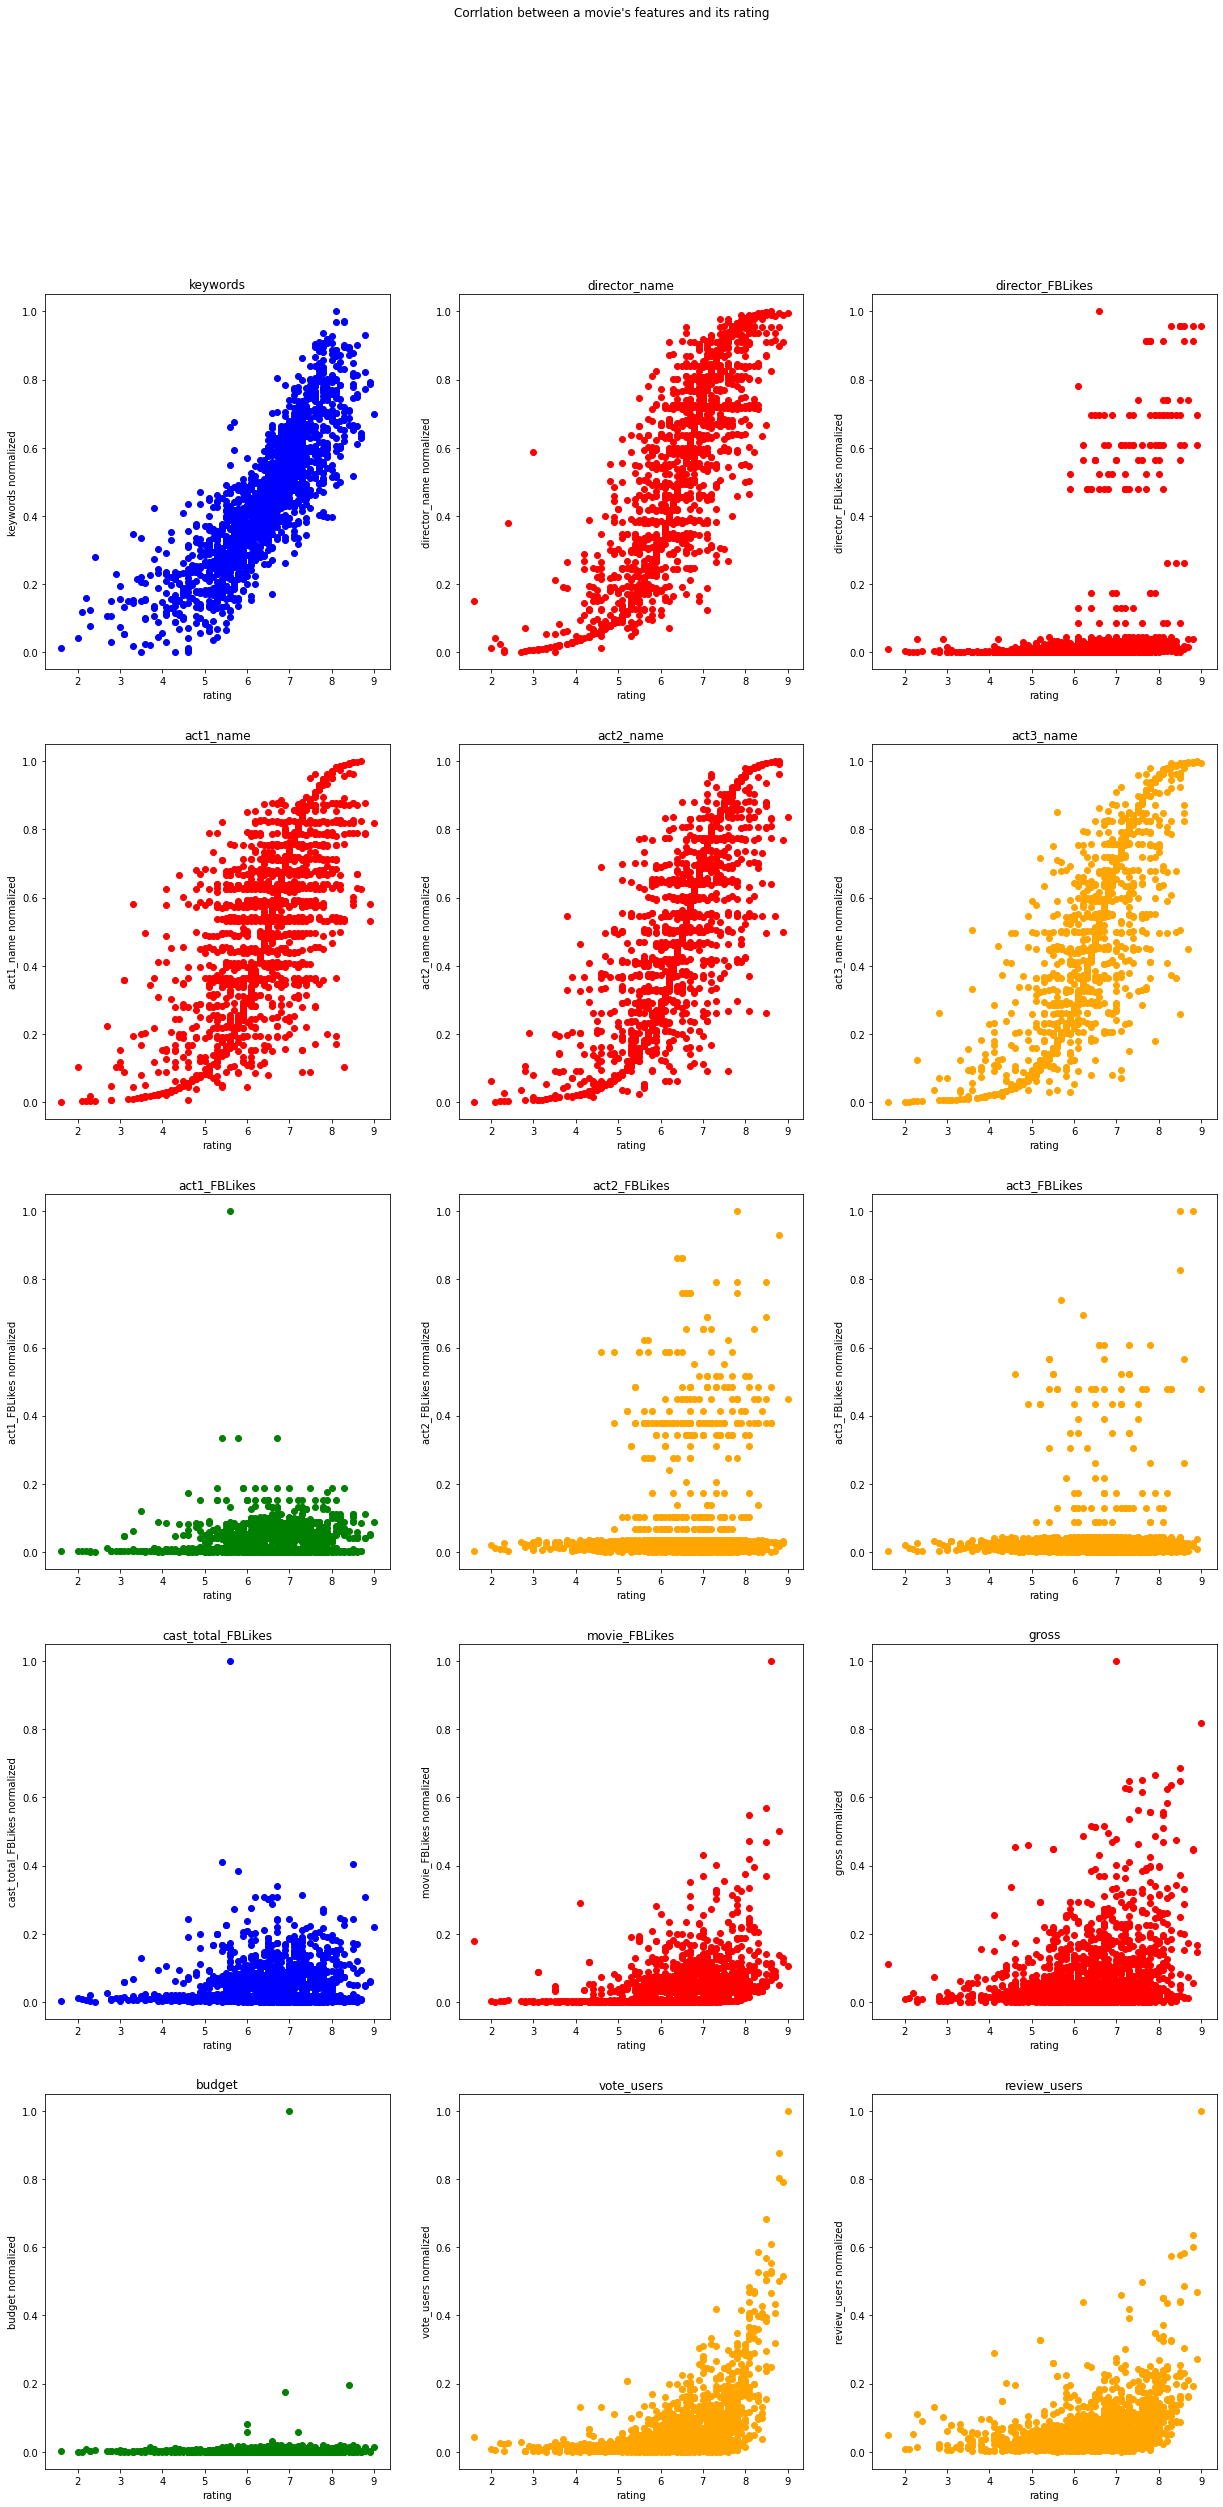

In [ ]:
fig, ax = plt.subplots(5,3, figsize=(21,40))

ax[0,0].scatter(y['rating'], X_sc['keywords'], facecolor='blue')
ax[0,0].set_xlabel('rating')
ax[0,0].set_ylabel('keywords normalized')
ax[0,0].set_title('keywords')

ax[0,1].scatter(y['rating'], X_sc['director_name'], facecolor='red')
ax[0,1].set_xlabel('rating')
ax[0,1].set_ylabel('director_name normalized')
ax[0,1].set_title('director_name')


ax[0,2].scatter(y['rating'], X_sc['director_FBLikes'], facecolor='red')
ax[0,2].set_xlabel('rating')
ax[0,2].set_ylabel('director_FBLikes normalized')
ax[0,2].set_title('director_FBLikes')

ax[1,0].scatter(y['rating'], X_sc['act1_name'], facecolor='red')
ax[1,0].set_xlabel('rating')
ax[1,0].set_ylabel('act1_name normalized')
ax[1,0].set_title('act1_name')

ax[1,1].scatter(y['rating'], X_sc['act2_name'], facecolor='red')
ax[1,1].set_xlabel('rating')
ax[1,1].set_ylabel('act2_name normalized')
ax[1,1].set_title('act2_name')

ax[1,2].scatter(y['rating'], X_sc['act3_name'], facecolor='orange')
ax[1,2].set_xlabel('rating')
ax[1,2].set_ylabel('act3_name normalized')
ax[1,2].set_title('act3_name')


ax[2,0].scatter(y['rating'], X_sc['act1_FBLikes'], facecolor='green')
ax[2,0].set_xlabel('rating')
ax[2,0].set_ylabel('act1_FBLikes normalized')
ax[2,0].set_title('act1_FBLikes')

ax[2,1].scatter(y['rating'], X_sc['act2_FBLikes'], facecolor='orange')
ax[2,1].set_xlabel('rating')
ax[2,1].set_ylabel('act2_FBLikes normalized')
ax[2,1].set_title('act2_FBLikes')

ax[2,2].scatter(y['rating'], X_sc['act3_FBLikes'], facecolor='orange')
ax[2,2].set_xlabel('rating')
ax[2,2].set_ylabel('act3_FBLikes normalized')
ax[2,2].set_title('act3_FBLikes')

ax[3,0].scatter(y['rating'], X_sc['cast_total_FBLikes'], facecolor='blue')
ax[3,0].set_xlabel('rating')
ax[3,0].set_ylabel('cast_total_FBLikes normalized')
ax[3,0].set_title('cast_total_FBLikes')

ax[3,1].scatter(y['rating'], X_sc['movie_FBLikes'], facecolor='red')
ax[3,1].set_xlabel('rating')
ax[3,1].set_ylabel('movie_FBLikes normalized')
ax[3,1].set_title('movie_FBLikes')

ax[3,2].scatter(y['rating'], X_sc['gross'], facecolor='red')
ax[3,2].set_xlabel('rating')
ax[3,2].set_ylabel('gross normalized')
ax[3,2].set_title('gross')

ax[4,0].scatter(y['rating'], X_sc['budget'], facecolor='green')
ax[4,0].set_xlabel('rating')
ax[4,0].set_ylabel('budget normalized')
ax[4,0].set_title('budget')

ax[4,1].scatter(y['rating'], X_sc['vote_users'], facecolor='orange')
ax[4,1].set_xlabel('rating')
ax[4,1].set_ylabel('vote_users normalized')
ax[4,1].set_title('vote_users')

ax[4,2].scatter(y['rating'], X_sc['review_users'], facecolor='orange')
ax[4,2].set_xlabel('rating')
ax[4,2].set_ylabel('review_users normalized')
ax[4,2].set_title('review_users')


fig.suptitle("Corrlation between a movie's features and its rating")

We notice that the following features have a significant correlation with the rating:

'keywords', 'director_name', 'act1_name', 'act2_name', 'act3_name', 'movie_FBLikes', 'gross',  'vote_users', 'review_users'

Therefore, we can keep just the above features, which have an outstanding correlation:

In [ ]:
filtered_features = ['keywords', 'director_name', 'act1_name', 'act2_name', 'act3_name', 'movie_FBLikes', 'gross',  'vote_users', 'review_users']

In [ ]:
X_sc_net = X_sc[ filtered_features ]

In [ ]:
X_sc_net.sample(5)

,keywords,director_name,act1_name,act2_name,act3_name,movie_FBLikes,gross,vote_users,review_users
3394,0.182438,0.126089,0.246123,0.365248,0.231955,0.000186,0.007195,0.001654,0.006860
3560,0.387935,0.346310,0.221173,0.177305,0.450000,0.001086,0.036958,0.003751,0.011147
1991,0.235086,0.039512,0.020904,0.203457,0.022556,0.000556,0.008670,0.002851,0.005145
1763,0.535656,0.772225,0.880647,0.696809,0.231955,0.031485,0.078928,0.106040,0.152626
4011,0.069465,0.088321,0.246797,0.148936,0.326316,0.002831,0.000147,0.007214,0.028510


In [ ]:
X_sc_net.to_csv('X_sc_net.csv', index=False)

 # Data Splitting into testing, training, and validation
 ---
 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc_net, y, test_size = 0.2)

In [ ]:
y_train.head()

,rating
2909,6.6
216,6.7
2693,5.6
2571,5.2
3420,6.4


In [ ]:
X_train.shape

(1332, 9)

 # Machine Learning Model
 ---
 

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor(colsample_bytree= 1, gamma= 0.2, max_depth= 6, min_child_weight= 3,
                         subsample = 0.8, objective='reg:squarederror')
regressor.fit(X_train, y_train)



XGBRegressor(gamma=0.2, max_depth=6, min_child_weight=3,
             objective='reg:squarederror', subsample=0.8)

In [ ]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred) 



In [ ]:
print(score)

0.9289271477324756


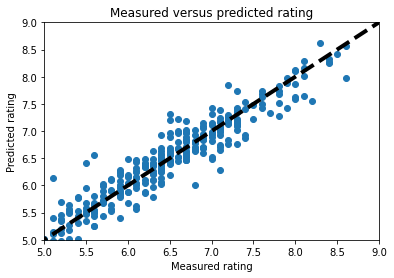

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured rating')
ax.set_ylabel('Predicted rating')
plt.title('Measured versus predicted rating')
plt.ylim((5, 9))   # set the ylim to bottom, top
plt.xlim(5, 9)     # set the ylim to bottom, top
plt.show()

 # Notes
 ---
 

* Why the regression method was chosen, rather than deep learning:
A deep learning model isn't preferable/necessary in this case, as the output has a continuous numerical value, ranging between 0 and 1. The regression model worked efficiently with a good accuracy.

* I could include some features, which showed some unclear correlation, such as: 'director_FBLikes', 'cast_total_FBLikes' and the other Facebook-Likes features, but they might not be fully independent (especially the  cast_total_FBLikes, which is the sum of the likes of the likes of the director, the first 3 actors and other actors).

* XGBoost was chosen over others, as it's one of the most efficient regressors.

* Fine-tuning of the hyperparameters:
- I first set colsample_bytree to 0.6, just being cautious it wouldn't take too long, then after it performed fast, I set it to 1